In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from jupyterquiz import display_quiz
from tqdm import tqdm
from IPython.display import display
from random import choice 

import ipywidgets as widgets 
from ipywidgets import interact, interact_manual, fixed 
from ipywidgets.embed import embed_minimal_html

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import random
%config InlineBackend.figure_format = 'svg'

font = {'family' : 'serif',
        'size'   : 17,
        'weight' : 'normal'
       }

plt.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', titlesize=20)
plt.rc('legend', fontsize=18)
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[T2A]{fontenc}')
plt.rc('text.latex', preamble=r'\usepackage[russian]{babel}')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Multi-armed bandits

<img src="https://miro.medium.com/max/339/0*l7Ra4R_CpJfc-hjz.png">

Multi-Armed Bandit is a Machine Learning framework in which an agent has to select actions (**arms**) in order to maximize its cumulative reward in the long term. In each round, the agent receives some information about the current state (**context**), then it chooses an action based on this information and the experience gathered in previous rounds. At the end of each round, the agent receives the reward associated with the chosen action.

Consider a scenario where we encounter `k` slot machines, commonly known as [one-armed bandits](https://en.wiktionary.org/wiki/one-armed_bandit), and our objective is to identify the one with the highest payout while minimizing potential losses. Opting for a strategy of trying each machine once and selecting the one with the highest immediate payoff is not advisable. Such an approach may lead the agent to choose a machine with a fortunate initial outcome but is suboptimal in the long run. Instead, the agent should iteratively revisit the machines that initially appear less promising to gather more information about their performance. This presents the **primary challenge** in the context of Multi-Armed Bandits: **striking a balance between leveraging existing knowledge to exploit favorable outcomes and engaging in exploration to prevent overlooking optimal actions**.

## Notation

* Actions: $\mathcal A = \{a_1, \ldots, a_k\}$ ($k$ levers)
* $A_t \in \mathcal A$ — action selected by the agent at time step $t$
* $R_t$ — reward for action $A_t$
* Action value: $q(a) = \mathbb E[R_t | A_t = a]$
* Optimal value: $v_* = \max\limits_{a \in \mathcal A} q(a)$
* Optimal action: $a_* = \arg\max\limits_{a \in \mathcal A} q(a)$
* Regret: $\Delta_a = v_* - q(a)$
* $Q_t(a)$ — estimation of $q(a)$ at time step $t$

The goal is to maximize expected cumulative reward

$$
    \sum\limits_{i=1}^t q(A_i) = \sum\limits_{i=1}^t \mathbb E[R_i | A_i = a] \to \max
$$

This is the same as to minimize cumulative regret:

$$
    \sum\limits_{i=1}^t \Delta_{A_i} \to \min
$$

## Bandit Strategies

Based on how we do exploration, there several ways to solve the multi-armed bandit.

* No exploration: the most naive approach and a bad one.
* Exploration at random
* Exploration smartly with preference to uncertainty

## Sample-average method

$$
Q_t(a) = \frac 1{N_t(a)}\sum\limits_{i=1}^{t-1} R_i \mathbb I[A_i=a],
$$

$$
\quad N_t(a) = \sum\limits_{i=1}^{t-1} \mathbb I[A_i=a]
$$

$N_t(a)$ is the number of times the action $a$ was taken. If $N_t(a) = 0$, then $Q_t(a)=0$ or some other default value.

<span style="display:none" id="sampleAverageMethod">W3sicXVlc3Rpb24iOiJTdXBwb3NlIGs9Mi4gV2hhdCBhcmUgJFFfNShhKSQ/IChSb3VuZCB0byB0aGUgbmVhcmVzdCBodW5kcmVkdGgpIiwidHlwZSI6Im51bWVyaWMiLCJhbnN3ZXJzIjpbeyJ0eXBlIjoidmFsdWUiLCJ2YWx1ZSI6IjAiLCJjb3JyZWN0Ijp0cnVlLCJmZWVkYmFjayI6IlJpZ2h0IG9uISBBbGwgdHJhaW5pbmcgcG9pbnRzIHdpbGwgYmUgY2xhc3NpZmllZCBjb3JyZWN0bHkifSx7InR5cGUiOiJkZWZhdWx0IiwiZmVlZGJhY2siOiJObywgdGhpcyBpcyBub3QgdHJ1ZSJ9XX0seyJxdWVzdGlvbiI6IlN1cHBvc2Ugaz0yLiBXaGF0IGFyZSAkUV81KGIpJD8gKFJvdW5kIHRvIHRoZSBuZWFyZXN0IGh1bmRyZWR0aCkiLCJ0eXBlIjoibnVtZXJpYyIsImFuc3dlcnMiOlt7InR5cGUiOiJ2YWx1ZSIsInZhbHVlIjoiMC4zMyIsImNvcnJlY3QiOnRydWUsImZlZWRiYWNrIjoiUmlnaHQgb24hIEFsbCB0cmFpbmluZyBwb2ludHMgd2lsbCBiZSBjbGFzc2lmaWVkIGNvcnJlY3RseSJ9LHsidHlwZSI6ImRlZmF1bHQiLCJmZWVkYmFjayI6Ik5vLCB0aGlzIGlzIG5vdCB0cnVlIn1dfV0=</span>

|   | 1  | 2 | 3  | 4  | 5|
|:-:|:-:|:-:|---|---|---|
| $a$ |  0 |   |   |   | ? |
| $b$ |   |  1 | 0  | 0  | ? |

In [2]:
display_quiz("#sampleAverageMethod")

<IPython.core.display.Javascript object>

<!-- **Q.** Suppose $k=2$. What are $Q_5(a)$ and $Q_5(b)$? -->

## Greedy policy

The $\varepsilon$-greedy algorithm takes the best action most of the time, but does random exploration occasionally

Select action with the highest estimation:

$$
    A_t = \arg\max\limits_{a\in \mathcal A} Q_t(a), \text{ or } \pi_t(a) = \mathbb I[A_t = \arg\max\limits_{a\in \mathcal A} Q_t(a)]
$$

**Q.** According to greedy policy, what is $A_5$ in the previous example?

## $\varepsilon$-greedy policy

* With probability $1-\varepsilon$ select greedy action 

$$
A_t = \arg\max\limits_{a\in \mathcal A} Q_t(a)
$$

* With probability $\varepsilon$ select a random action


<span style="display:none" id="epsilonGreedyPolicy">W3sicXVlc3Rpb24iOiJJZiB3ZSBmb2xsb3cgJFxcdmFyZXBzaWxvbiQtZ3JlZWR5IHN0cmF0ZWd5LCB3aGF0IGlzIHRoZSBwcm9iYWJpbGl0eSBvZiBzZWxlY3Rpb24gb2YgdGhlIGdyZWVkeSBhY3Rpb24/IiwidHlwZSI6Im1hbnlfY2hvaWNlIiwiYW5zd2VycyI6W3siYW5zd2VyIjoiMSAtICRcXHZhcmVwc2lsb24kIiwiY29ycmVjdCI6dHJ1ZSwiZmVlZGJhY2siOiJUaGlzIGlzIHRoZSBjb3JyZWN0In0seyJhbnN3ZXIiOiIkXFx2YXJlcHNpbG9uJCIsImNvcnJlY3QiOmZhbHNlLCJmZWVkYmFjayI6Ik5vdCBjb3JyZWN0In0seyJhbnN3ZXIiOiIwLjUgLSAkXFx2YXJlcHNpbG9uJCIsImNvcnJlY3QiOmZhbHNlLCJmZWVkYmFjayI6Ik5vdCBjb3JyZWN0In0seyJhbnN3ZXIiOiIwLjUiLCJjb3JyZWN0IjpmYWxzZSwiZmVlZGJhY2siOiJOb3QgY29ycmVjdCJ9XX1d</span>

In [3]:
display_quiz("#epsilonGreedyPolicy")

<IPython.core.display.Javascript object>

## Testbed

A testbed for k-armed bandits is created in class `Testbed`. The reward produced by each arm is taken from $\mathcal N(a_i, 1)$, where $a_i$ are in turn sampled from the standard normal distribuion.

In [4]:
class Testbed:
    def __init__(self, k=10, initial_value=0.0, n_runs=2000, random_state=42):
        """
            Creates a testbed for k-armed bandits. 
            The reward produced by each arm is taken from N(a_i, 1),
            where a_i are in turn sampled from the standard normal distribuion.

            Parameters
            ----------
            k : int
                The number of arms.
            initial_value : float, optional
                The default value for Q_1(a).
            n_runs : int, optional
                The number of independent copies of the testbed, 2000 by default.
            random_state: int, optional
                The value use to reseed the random number generator.
        """
        self.k = k
        np.random.seed(random_state)
        self.means = np.random.randn(n_runs, k)
        self.sample_averages = initial_value*np.ones((n_runs, k))
        self.n_tries = np.zeros((n_runs, k))
        self.n_runs = n_runs
        
    def plot(self, idx=None, n_samples=3000):
        """
            Plots k violin plots (one plot per arm) showing the true distribution of the rewards.
            
            Parameters
            ----------
            idx : int
                The index of the testbed to be plotted.
            n_samples : int, optional
                The number of samples taken from the gaussian distribution.
        """
        if idx is not None:
            figure = plt.figure(figsize=(9, 5))
            samples = norm.rvs(size=(n_samples, self.k), loc=self.means[idx, :])
            violin_parts = plt.violinplot(samples, showmeans=True, showextrema=False, points=1000)
            for pc in violin_parts['bodies']:
                pc.set_facecolor('red')
                pc.set_edgecolor('black')
            plt.grid(ls=':')
            plt.xticks(np.arange(1, self.k + 1))
            plt.yticks(np.arange(-5, 6))
            plt.show()
            return

        fig = go.Figure()
        
        colors = ['red', 'green', 'maroon', 'maroon', 'brown', 'orange']

        for i in range(self.n_runs):
            samples = norm.rvs(size=(n_samples, self.k), loc=self.means[i, :])
            for j in range(self.k):
                fig.add_trace(go.Violin(y=samples[:, j], name=f'{j+1}', box_visible=True, line_color=colors[i], opacity=0.6, legendgroup=str(j + 1), scalegroup=str(j + 1),))

        fig.update_layout(
            xaxis=dict(tickmode='array', tickvals=np.arange(1, self.k + 1)),
            yaxis=dict(tickmode='array', tickvals=np.arange(-5, 6)),
            title_text="Distributions for " + str(self.n_runs) + " runs",
            showlegend=False,
            height=500,  
            width=900
        )
        
        fig.show()
        
    def optimal_action(self, idx=None):
        """
            Returns the action with maximal average reward.
            
            Parameters
            ----------
            idx : int or None, optional
                If None, returns the best action for all testbeds, otherwise only for testbed with index idx.
                
            Returns
            ----------
            index_array : ndarray or int
                Index of optimal action in each testbed.
        """
        if idx is None:
            return np.argmax(self.means, axis=1)
        return np.argmax(self.means[idx, :])
    
    def greedy_action(self, eps=0):
        """
            Returns the action according to 𝜺-greeedy policy
            
            Parameters
            ----------
            eps : float, optional
                The probability of taking the random action. By default the policy is greedy (𝜺=0)
                
            Returns
            ----------
            index_array : ndarray
                Index of selected action in each testbed.
        """
        mask = np.random.rand(self.means.shape[0])
        actions = np.argmax(self.sample_averages, axis=1)
        actions[mask <= eps] = np.random.randint(10, size=(mask <= eps).sum())
        return actions
    
    def ucb_action(self, t, c=0):
        """
            Selects action according to UCB algorithm.
            
            Parameters
            ----------
            t : int
                Time step.
            с : float, optional
                Specifies the size of the upper confidence bound. c=0 (default) means greedy action.
                
            Returns
            ----------
            index_array : ndarray
                Index of selected action in each testbed.
        """
        EPS = 1e-10
        
        self.n_tries[self.n_tries == 0] = EPS
        actions = np.argmax(self.sample_averages + c*np.sqrt(np.log(t)/self.n_tries), axis=1)
        return actions
    
    def step(self, action_indices, alpha=None, nonstationary=False):
        """
            Updates sample averages according to selected actions and returns the rewards from the pulled arm in each testbed.
            
            Parameters
            ----------
            action_indices : ndarray
                Index of the selected action in each testbed.
            alpha: float, optional
                If None, then the step size is 1/n, otherwise it is a constant.
                
            Returns
            ----------
            rewards : ndarray
                Rewards obtained from each testbed.
            
        """
        row_indices = np.arange(self.means.shape[0])
        rewards = norm.rvs(size=self.means.shape[0], loc=self.means[row_indices, action_indices])
        self.n_tries[row_indices, action_indices] += 1
        
        if alpha is None:
            alpha = 1./self.n_tries[row_indices, action_indices]
        self.sample_averages[row_indices, action_indices] += \
            alpha*(rewards - self.sample_averages[row_indices, action_indices])
        if nonstationary:
            self.means += np.random.normal(scale=0.1, size=self.means.shape)
        return rewards

    def gradient_bandit(self, steps, alpha, initial_Q, is_baseline=True):
        rewards = np.zeros(steps)
        actions = np.zeros(steps)
        
        for i in range(self.means.shape[0]):
            Q = np.ones(self.k) * initial_Q  # initial Q
            N = np.zeros(self.k)  # initialize number of rewards given
            R = np.zeros(self.k)
            H = np.zeros(self.k)  # initialize preferences
            pi = np.zeros(self.k)
            best_action = np.argmax(self.means[i])  # best action of i'th problem
            
            for t in range(steps):
                a, pi = self.softmax(H)

                reward = self.step_bandit(a, i)

                N[a] += 1
                Q[a] = Q[a] + (reward - Q[a]) / N[a]
                
                for action_i in range(self.k):
                    if action_i == a:
                        H[a] = H[a] + alpha * (reward - R[a]) * (1 - pi[a])
                    else:
                        H[action_i] = H[action_i] - alpha * (reward - R[action_i]) * pi[action_i]

                if is_baseline:
                    R[a] = Q[a]

                rewards[t] += reward
                if a == best_action:
                    actions[t] += 1
        
        return np.divide(rewards, self.means.shape[0]), np.divide(actions, self.means.shape[0])

    def softmax(self, H):
        e_x = np.exp(H - np.max(H)) 
        M = e_x / e_x.sum()
        return np.argmax(M), M

    def step_bandit(self, action, idx):
        reward = norm.rvs(loc=self.means[idx, action])
        self.n_tries[idx, action] += 1
        alpha = 1. / self.n_tries[idx, action]
        self.sample_averages[idx, action] += alpha * (reward - self.sample_averages[idx, action])
        return reward

Optimal action: 4
Optimal mean reward: 2.550700444806366


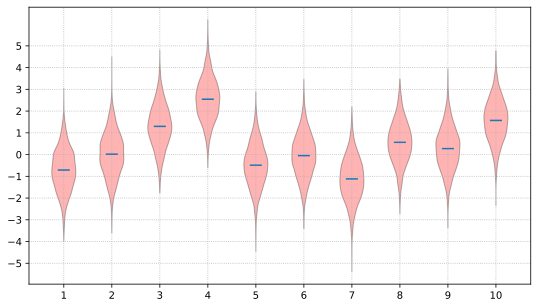

In [26]:
plt.rcParams.update(plt.rcParamsDefault)

tb = Testbed(10, random_state=242, n_runs=3)

idx = 1
print("Optimal action:", tb.optimal_action(idx) + 1)
print("Optimal mean reward:", tb.means[idx].max())
tb.plot(idx)

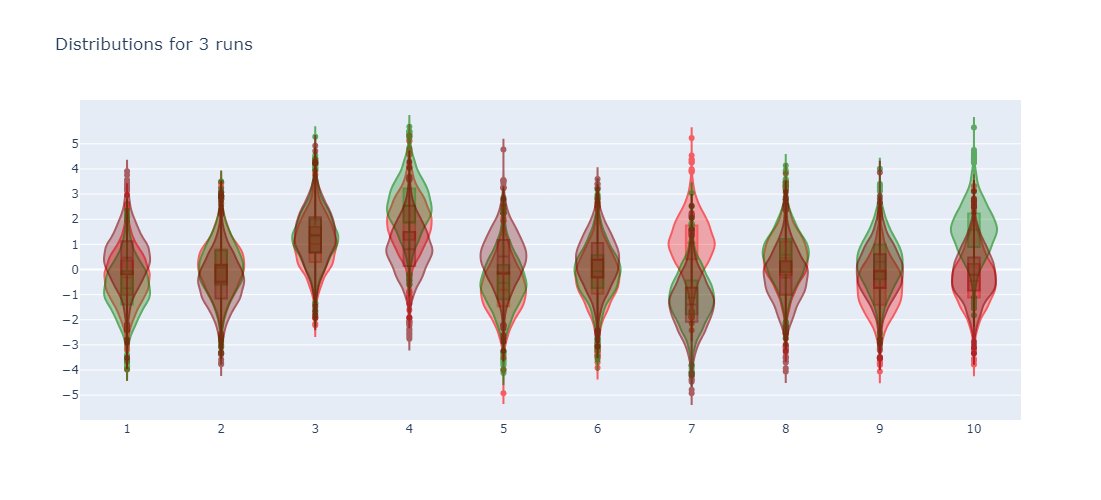

In [27]:
tb.plot()

In [6]:
def train_eps_greedy_agent(eps, initial_value=0.0, alpha=None, n_steps=1000,
                           n_runs=2000, k=10, random_state=242, nonstationary=False):
    mean_rewards = [] 
    mean_optimal_actions = []

    tb = Testbed(k, initial_value, n_runs, random_state)
    for _ in range(n_steps):
        actions = tb.greedy_action(eps)
        optimals = (actions == tb.optimal_action())
        rewards = tb.step(actions, alpha, nonstationary)
        mean_rewards.append(rewards.mean())
        mean_optimal_actions.append(optimals.mean())
    
    return mean_rewards, mean_optimal_actions

def mean_rewards_and_optimal_actions(eps_list, initial_value=0.0, alpha=None, n_steps=1000,
                                     n_runs=2000, k=10, random_state=242, nonstationary=False):
    rewards_list = []
    optimal_actions_list = []
    for eps in eps_list:
        mean_rewards, mean_optimal_actions = train_eps_greedy_agent(
            eps, initial_value, alpha, n_steps, n_runs, k, random_state, nonstationary
        )
        rewards_list.append(mean_rewards)
        optimal_actions_list.append(mean_optimal_actions)
    return rewards_list, optimal_actions_list

In [7]:
%%time
eps_list = [0, 0.001, 0.01, 0.1, 0.5]
labels = [r"$\varepsilon = {}$".format(eps) for eps in eps_list]
labels_obj = [r"(ε) = {}".format(eps) for eps in eps_list]
rewards_list, optimal_action_list = mean_rewards_and_optimal_actions(eps_list, n_steps=5000)

CPU times: total: 10.5 s
Wall time: 10.5 s


In [8]:
def plot_mean_rewards_plotly(mean_rewards, labels, max_step=1000):
    colors = ['r', 'b', 'g', 'm', 'brown', 'orange']
    fig = go.Figure()

    for i, rewards in enumerate(mean_rewards):
        fig.add_trace(go.Scatter(x=list(range(max_step)), y=rewards[:max_step], mode='lines',name=labels[i]))
    
    fig.update_layout(
        dragmode="zoom",
        hovermode="x",
        legend=dict(traceorder="reversed"),
        height=600,
        template="plotly_white",
        margin=dict(
            t=100,
            b=100
        ),
       title_text="Average rewards",
       xaxis_title="time steps"
    )
    fig.show()

In [9]:
def plot_mean_optimal_actions(mean_rewards, labels, max_step=1000):
    fig = go.Figure()

    for i, rewards in enumerate(mean_rewards):
        fig.add_trace(go.Scatter(x=list(range(max_step)), y=rewards[:max_step], mode='lines',name=labels[i]))
    
    fig.update_layout(
        dragmode="zoom",
        hovermode="x",
        legend=dict(traceorder="reversed"),
        height=600,
        template="plotly_white",
        margin=dict(
            t=100,
            b=100
        ),
        title_text="Percentage of optimal actions",
        xaxis_title="time steps",
        yaxis_title="%"
    )
    
    fig.update_yaxes(tickformat=".2%")

    fig.show()

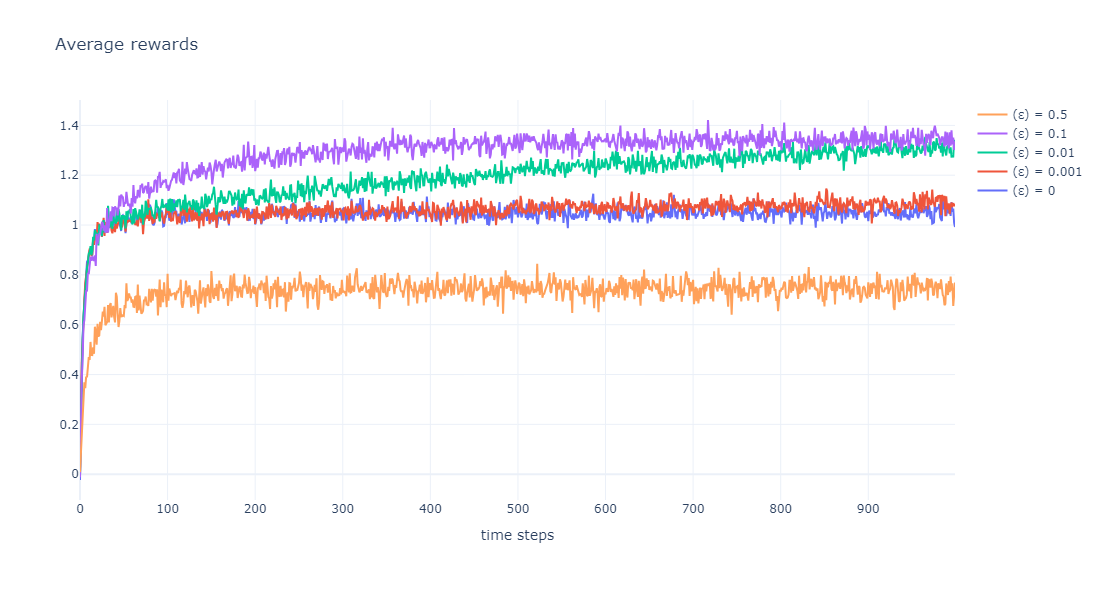

In [10]:
plot_mean_rewards_plotly(rewards_list, labels_obj, 1000)

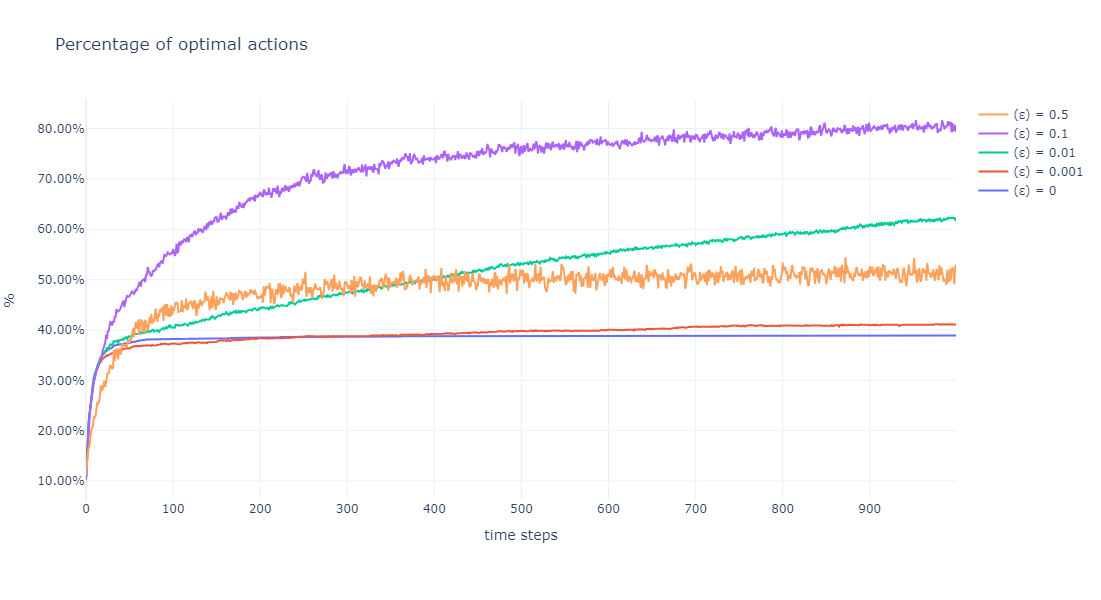

In [11]:
plot_mean_optimal_actions(optimal_action_list, labels_obj, 1000)

**Q.** What is the cumulative regret of $\varepsilon$-greedy policy for a single testbed? Calculate

$$
    \lim\limits_{t\to\infty} \frac 1t \sum\limits_{i=1}^t \Delta_{A_i} \text{ and }
    \lim\limits_{t\to\infty} \frac 1t \sum\limits_{i=1}^t \mathbb P(A_i = a_*)
$$

if all the actions $A_i$ are selected according to $\varepsilon$-greedy policy.

## Optimistic initial value

Putting $Q_1(a)=5$ for all actions will encourage the exploration in the first steps.

In [12]:
%%time
rewards_opt_0_const, actions_opt_0_const = train_eps_greedy_agent(0.0, 5.0, 0.1, n_steps=2000)
rewards_opt_01, actions_opt_01 = train_eps_greedy_agent(0.1, 5.0, n_steps=2000)
rewards_01_const, actions_01_const = train_eps_greedy_agent(0.1, 0.0, alpha=0.1, n_steps=2000)

CPU times: total: 2.58 s
Wall time: 2.58 s


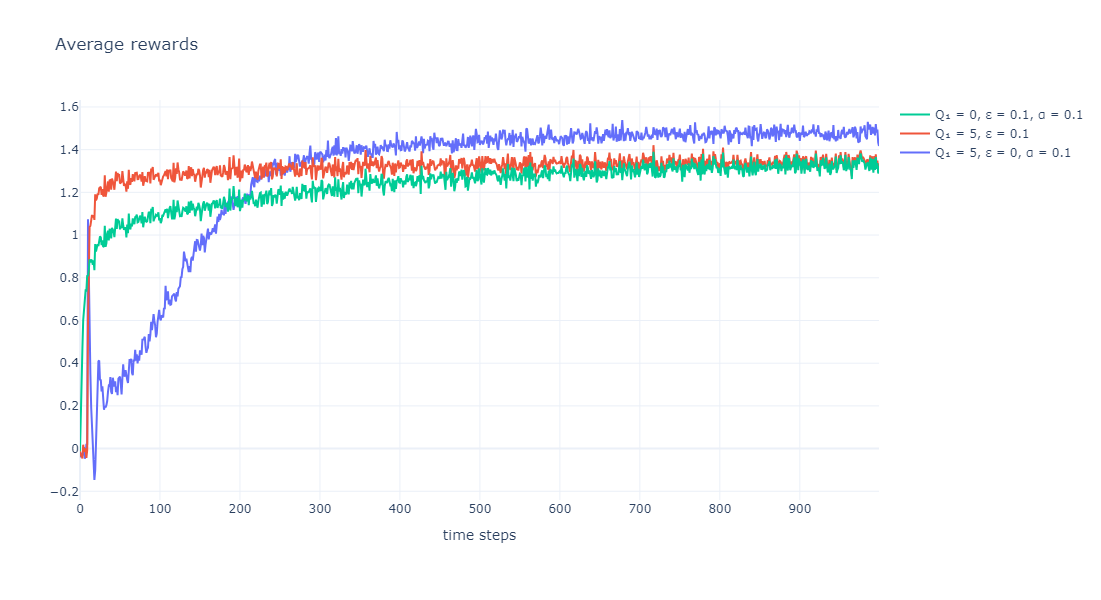

In [13]:
labels_obj = ['Q₁ = 5, ε = 0, α = 0.1','Q₁ = 5, ε = 0.1','Q₁ = 0, ε = 0.1, α = 0.1']
plot_mean_rewards_plotly([rewards_opt_0_const, rewards_opt_01, rewards_01_const], labels_obj, 1000)

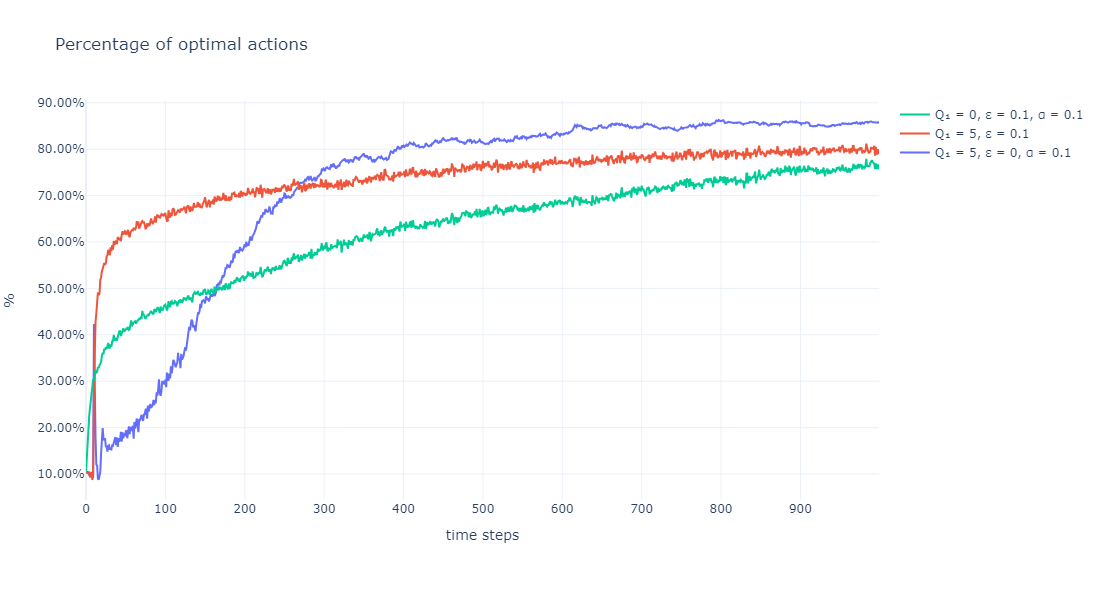

In [14]:
labels_obj = ['Q₁ = 5, ε = 0, α = 0.1','Q₁ = 5, ε = 0.1','Q₁ = 0, ε = 0.1, α = 0.1']
plot_mean_optimal_actions([actions_opt_0_const, actions_opt_01, actions_01_const], labels_obj, 1000)

<span style="display:none" id="mysteriousSpikes">W3sicXVlc3Rpb24iOiJXaHkgbWlnaHQgdGhlcmUgYmUgb3NjaWxsYXRpb25zIGFuZCBzcGlrZXMgaW4gdGhlIGVhcmx5IHBhcnQgb2YgdGhlIGN1cnZlIGZvciB0aGUgb3B0aW1pc3RpYyBtZXRob2QsIGRlc3BpdGUgdGhlIHJlbGlhYmlsaXR5IG9mIG9wdGltaXN0aWMgaW5pdGlhbCB2YWx1ZXM/IiwidHlwZSI6Im1hbnlfY2hvaWNlIiwiYW5zd2VycyI6W3siYW5zd2VyIjoiVGhlIG9wdGltaXN0aWMgbWV0aG9kIHBlcmZvcm1zIHdvcnNlIGJlY2F1c2UgaXQgZXhwbG9yZXMgbW9yZSIsImNvcnJlY3QiOnRydWUsImZlZWRiYWNrIjoiVGhpcyBpcyB0aGUgY29ycmVjdCJ9LHsiYW5zd2VyIjoiVGhlIG9wdGltaXN0aWMgbWV0aG9kIGF2b2lkcyBleHBsb3JhdGlvbiBpbiB0aGUgZWFybHkgc3RlcHMiLCJjb3JyZWN0IjpmYWxzZSwiZmVlZGJhY2siOiJOb3QgY29ycmVjdCJ9LHsiYW5zd2VyIjoiQXZlcmFnZXMgb3ZlciAyMDAwIHRhc2tzIHJlc3VsdCBpbiBjb25zdGFudCBmbHVjdHVhdGlvbnMiLCJjb3JyZWN0IjpmYWxzZSwiZmVlZGJhY2siOiJOb3QgY29ycmVjdCJ9LHsiYW5zd2VyIjoiT3NjaWxsYXRpb25zIGFyZSBhIG5hdHVyYWwgcGFydCBvZiB0aGUgb3B0aW1pc3RpYyBtZXRob2QiLCJjb3JyZWN0IjpmYWxzZSwiZmVlZGJhY2siOiJOb3QgY29ycmVjdCJ9XX1d</span>

In [15]:
display_quiz("#mysteriousSpikes")

<IPython.core.display.Javascript object>

## Upper Confidence Bound

The inherent randomness may lead us to explore suboptimal actions that were confirmed as unfavorable in the past. To avoid such inefficient exploration, one approach is to *decrease the parameter ε in time* and the other is *to be optimistic about options with high uncertainty* and thus to prefer actions for which we haven’t had a confident value estimation yet. The upper bound algorithm intelligently combines the gradual refinement of exploration parameters and an optimistic approach to uncertain options.

$$
A_t = \arg\max\limits_a \bigg\{Q_t(a) + U_t(a)\bigg\} = \arg\max\limits_a \bigg\{Q_t(a) + c\sqrt{\frac{\log t}{N_t(a)}}\bigg\}
$$

* $U_t(a)$ — estimation of an upper bound confidence
* $c > 0$ - confidence level that controls the degree of exploration
* The upper boundary is proportional to the squared root of $\log t$, which means that when the experiment progresses, all arms have their upper boundaries increases by a factor of squared root of ln(n).
* This upper boundary is inversely proportional to the squared root of $N_t(a)$. The more times the specific arm has been engaged before in the past, the greater the confidence boundary reduces towards the point estimate.

````{admonition} More information about this mysterious formula 
:class: tip
* Sutton&Barto, chapter 2.7
* [Lecture 2](https://www.youtube.com/watch?v=aQJP3Z2Ho8U&list=PLqYmG7hTraZDVH599EItlEWsUOsJbAodm&index=2&t=3100s) from DeepMind, 53:20 — 1:10:00
````

In [16]:
def train_ucb_agent(c, n_steps=1000, n_runs=2000, k=10, random_state=242):
    mean_rewards = [] 
    mean_optimal_actions = []

    tb = Testbed(k, 0, n_runs, random_state)
    for t in range(n_steps):
        actions = tb.ucb_action(t + 1, c)
        optimals = (actions == tb.optimal_action())
        rewards = tb.step(actions)
        mean_rewards.append(rewards.mean())
        mean_optimal_actions.append(optimals.mean())
    
    return mean_rewards, mean_optimal_actions

In [17]:
%%time
rewards_eps, optimals_eps = train_eps_greedy_agent(0.1, n_steps=1000)
rewards_ucb_1, optimals_ucb_1 = train_ucb_agent(1, n_steps=1000)
rewards_ucb_2, optimals_ucb_2 = train_ucb_agent(2, n_steps=1000)

CPU times: total: 1.31 s
Wall time: 1.33 s


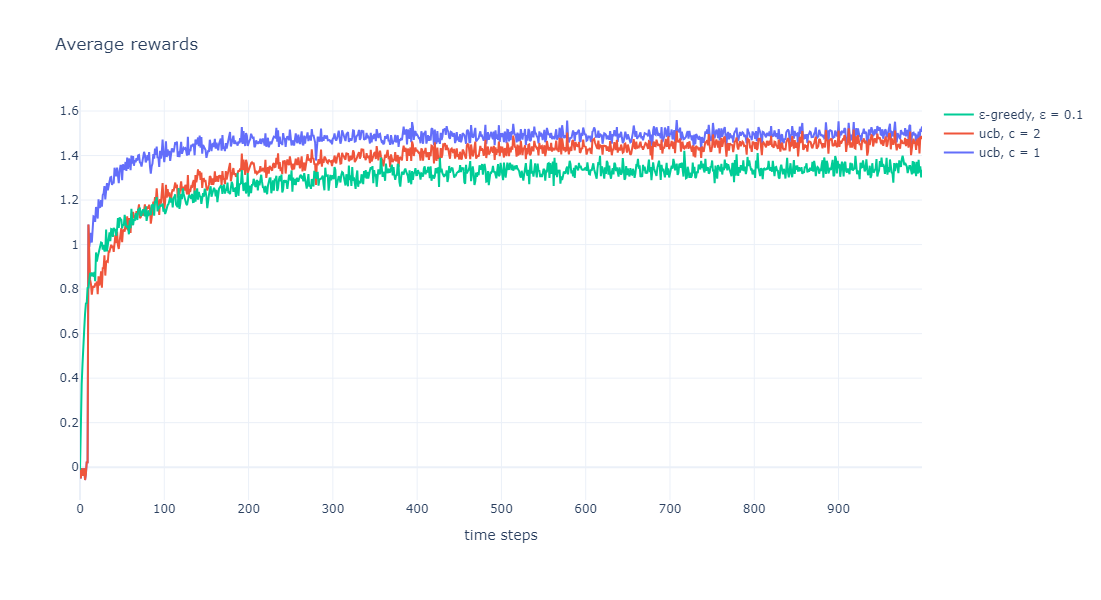

In [18]:
labels_obj = ['ucb, c = 1','ucb, c = 2',r'ε-greedy, ε = 0.1']
plot_mean_rewards_plotly([rewards_ucb_1, rewards_ucb_2, rewards_eps], labels_obj, 1000)

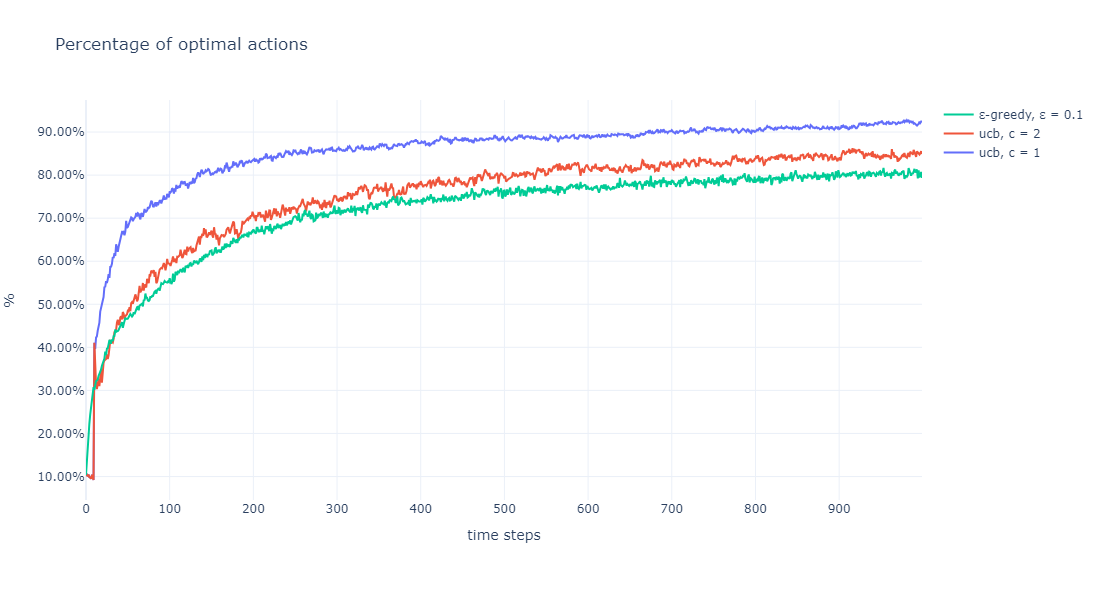

In [19]:
labels_obj = ['ucb, c = 1','ucb, c = 2','ε-greedy, ε = 0.1']
plot_mean_optimal_actions([optimals_ucb_1, optimals_ucb_2, optimals_eps], labels_obj, 1000)

# Gradient Bandit Algorithms

We consider learning a numerical preference for each action a, which we denote $H_t(a) \in \mathbb R$.

The larger the preference, the more often that action is taken, but the preference has no interpretation in terms of reward. Only the relative preference of one action over another is important.

Action probabilities are determined according to a soft-max distribution (i.e., Gibbs or Boltzmann distribution) as follows:

$$Pr\{A_t = a\} = \frac{e^{H_t(a)}}{\sum_{b=1}^k e^{H_t(b)}} = \pi_t(a)$$

* $\pi_t(a)$ - for the probability of taking action $a$ at time $t$

There is a natural learning algorithm for soft-max action preferences based on the idea of stochastic gradient ascent. On each step, after selecting action $A_t$ and receiving the reward $R_t$, the action preferences are updated by:

$$H_{t+1}(A_t) = H_t(A_t) + \alpha (R_t - \bar{R}_t) (1 - \pi_t(A_t))$$

and, 

$$H_{t+1}(a) = H_t(a) + \alpha (R_t - \bar{R}_t) \pi_t(a)$$ 

for $a \neq A_t$

where $\alpha > 0$ is a step-size parameter, and $\bar{R}_t \in \mathbb{R}$ is the average of the rewards up to but not including time $t$.

The $\bar{R}_t$ term serves as a baseline with which the reward is compared. If the reward is higher than the baseline, then the probability of taking At in the future is increased, and if the reward is below baseline, then the probability is decreased. The non-selected actions move in the opposite direction.

````{admonition} For more information
:class: tip
* Sutton&Barto, chapter 2.8
````

In [20]:
def train_gradient_agent(n_steps=1000, n_runs=2000, k=10, random_state=242, initial_value=0.0, alpha=0.1, is_baseline=True):
    tb = Testbed(k=k, initial_value=0.0, n_runs=n_runs, random_state=random_state)
    mean_rewards, mean_optimal_actions = tb.gradient_bandit(steps=n_steps, alpha=alpha, initial_Q=initial_value, is_baseline=is_baseline)
    
    return mean_rewards, mean_optimal_actions

In [21]:
rewards_gradient_with_baseline, optimals_gradient_with_baseline = train_gradient_agent()
rewards_gradient_without_baseline, optimals_gradient_without_baseline = train_gradient_agent(is_baseline=False)
rewards_gradient_with_baseline_with_alpha, optimals_gradient_with_baseline_with_alpha = train_gradient_agent(alpha=0.4)
rewards_gradient_without_baseline_with_alpha, optimals_gradient_without_with_alpha = train_gradient_agent(alpha=0.4, is_baseline=False)

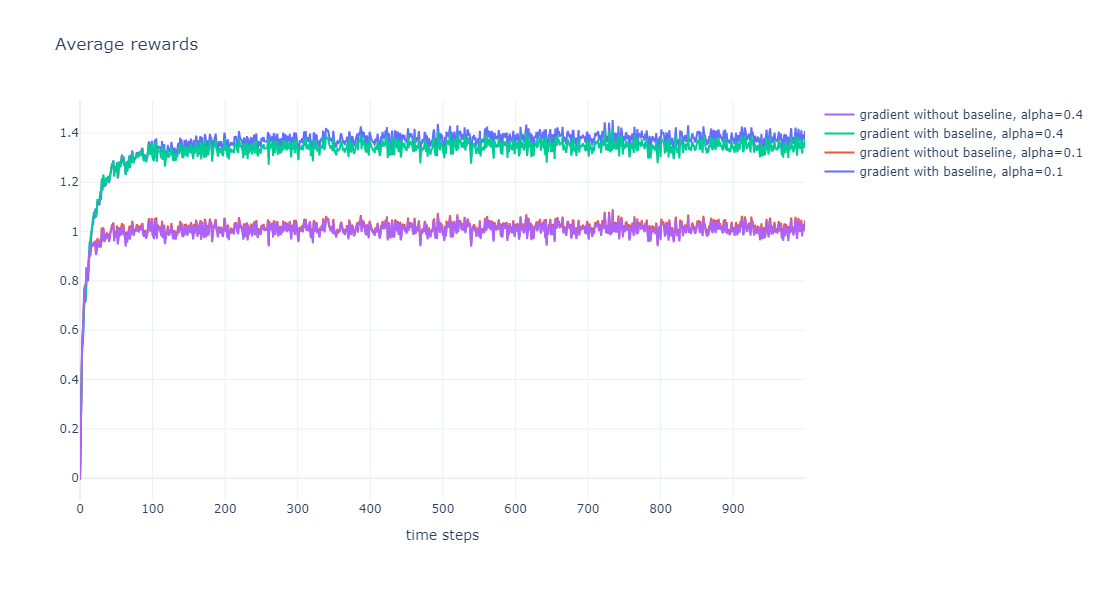

In [22]:
labels_obj = ['gradient with baseline, alpha=0.1', 'gradient without baseline, alpha=0.1', 'gradient with baseline, alpha=0.4', 'gradient without baseline, alpha=0.4']
plot_mean_rewards_plotly([rewards_gradient_with_baseline, rewards_gradient_without_baseline, rewards_gradient_with_baseline_with_alpha, rewards_gradient_without_baseline_with_alpha], labels_obj, 1000)

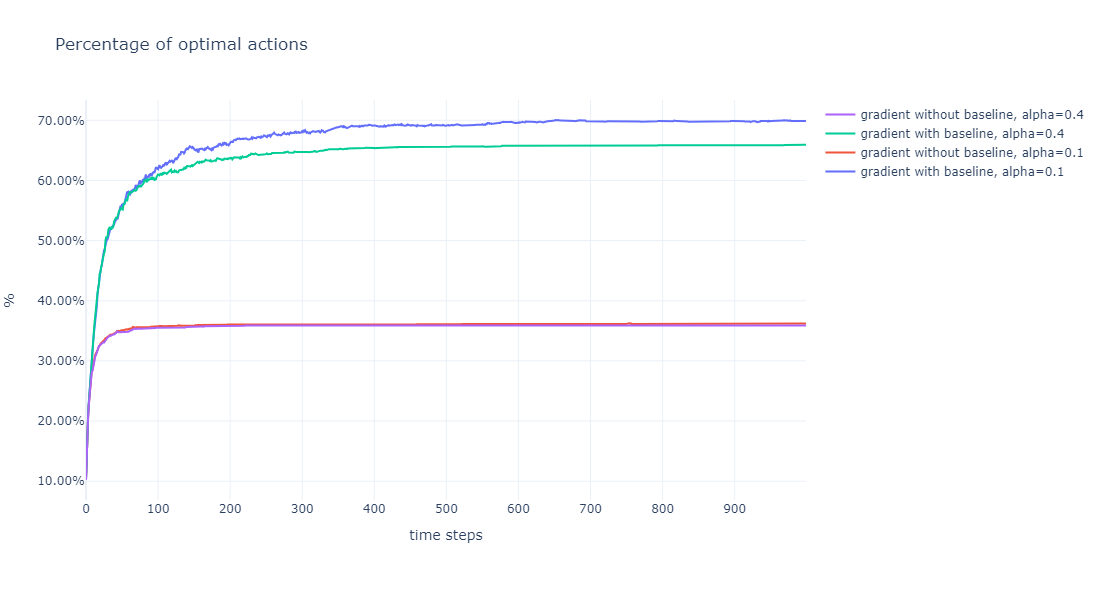

In [23]:
labels_obj = ['gradient with baseline, alpha=0.1', 'gradient without baseline, alpha=0.1', 'gradient with baseline, alpha=0.4', 'gradient without baseline, alpha=0.4']
plot_mean_optimal_actions([optimals_gradient_with_baseline, optimals_gradient_without_baseline, optimals_gradient_with_baseline_with_alpha, optimals_gradient_without_with_alpha], labels_obj, 1000)

# Associative Search (Contextual Bandits)

In **nonassociative tasks**, there is no need to associate different actions with different situations. In these tasks the learner either tries to find a single best action when the task is stationary, or tries to track the best action as it changes over time when the task is nonstationary.

***Associative search task*** involves both trial-and-error learning to search for the best actions, and association of these actions with the situations in which they are best. Associative search tasks are often called contextual bandits.

Associative search tasks are intermediate between the k-armed bandit problem and the full reinforcement learning problem. They are like the full reinforcement learning problem in that they involve learning a policy, but they are also like our version of the k-armed bandit problem in that each action affects only the immediate reward. If actions are allowed to affect the next situation as well as the reward, then we have the full reinforcement learning problem.

**Q**. *Suppose you face a 2-armed bandit task whose true action values change randomly from time step to time step. Specifically, suppose that, for any time step, the true values of action 1 and 2 are respectively 0.1 and 0.2 with probability 0.5 (case A), and 0.9 and 0.8 with probability 0.5 (case B). If you are not able to tell which case you face at any step, what is the best expectation of success you can achieve and how should you behave to achieve it?*

| case  | arm 1  | arm 2 | prob |
|:-:|:-:|:-:|:-:|
| $A$ | 0.1 | 0.2 |    |
| $B$ | 0.9 | 0.8 |    |

<span style="display:none" id="associativeSearch">W3sicXVlc3Rpb24iOiJXaGF0IGlzIGJlc3QgZXhwZWN0YXRpb24gb2Ygc3VjY2VzcyBmb3IgY2FzZSBBPyIsInR5cGUiOiJudW1lcmljIiwiYW5zd2VycyI6W3sidHlwZSI6InZhbHVlIiwidmFsdWUiOiIwLjUiLCJjb3JyZWN0Ijp0cnVlLCJmZWVkYmFjayI6IlJpZ2h0IG9uISBBbGwgdHJhaW5pbmcgcG9pbnRzIHdpbGwgYmUgY2xhc3NpZmllZCBjb3JyZWN0bHkifSx7InR5cGUiOiJkZWZhdWx0IiwiZmVlZGJhY2siOiJObywgdGhpcyBpcyBub3QgdHJ1ZSJ9XX0seyJxdWVzdGlvbiI6IldoYXQgaXMgYmVzdCBleHBlY3RhdGlvbiBvZiBzdWNjZXNzIGZvciBjYXNlIEI/IiwidHlwZSI6Im51bWVyaWMiLCJhbnN3ZXJzIjpbeyJ0eXBlIjoidmFsdWUiLCJ2YWx1ZSI6IjAuNSIsImNvcnJlY3QiOnRydWUsImZlZWRiYWNrIjoiUmlnaHQgb24hIEFsbCB0cmFpbmluZyBwb2ludHMgd2lsbCBiZSBjbGFzc2lmaWVkIGNvcnJlY3RseSJ9LHsidHlwZSI6ImRlZmF1bHQiLCJmZWVkYmFjayI6Ik5vLCB0aGlzIGlzIG5vdCB0cnVlIn1dfV0=</span>

In [24]:
display_quiz("#associativeSearch")

<IPython.core.display.Javascript object>